# Francis Regalado Final Project

In [76]:
import os
import zipfile
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data set

In [2]:
# Extract files import zipfile
# if not os.path.exists("Data"):
# os.mkdir("Data")
with zipfile.ZipFile("Data/Motor_Vehicle_Collisions_-_Crashes.csv.zip", "r") as file:
     file.printdir()
     file.extractall("Data/CarCrashes")

File Name                                             Modified             Size
Motor_Vehicle_Collisions_-_Crashes.csv         2019-12-20 02:19:52    360413698
__MACOSX/                                      2019-12-20 02:30:52            0
__MACOSX/._Motor_Vehicle_Collisions_-_Crashes.csv 2019-12-20 02:19:52          481


# Reading the data set

In [3]:
Accident_data = pd.read_csv("Data/CarCrashes/Motor_Vehicle_Collisions_-_Crashes.csv", delimiter= ",")

/Users/francisregalado/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
Accident_data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,07/28/2019,17:56,BROOKLYN,11234,40.621178,-73.930050,POINT (-73.93005 40.621178),SCHENECTADY AVENUE,AVENUE M,NaN,...,Unspecified,NaN,NaN,NaN,4179520,Sedan,Sedan,NaN,NaN,NaN
1,08/18/2019,16:43,NaN,NaN,40.613186,-73.974900,POINT (-73.9749 40.613186),NaN,NaN,24 AVENUE,...,NaN,NaN,NaN,NaN,4191673,Sedan,NaN,NaN,NaN,NaN
2,08/06/2019,0:00,NaN,NaN,40.689228,-73.984700,POINT (-73.9847 40.689228),LIVINGSTON STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4184107,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,08/21/2019,19:30,QUEENS,11413,40.665634,-73.758156,POINT (-73.758156 40.665634),SOUTH CONDUIT AVENUE,SPRINGFIELD BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,4194389,Sedan,Sedan,NaN,NaN,NaN
4,07/29/2019,9:45,NaN,NaN,40.789314,-73.841880,POINT (-73.84188 40.789314),126 STREET,NaN,NaN,...,Unspecified,Unspecified,NaN,NaN,4179128,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN


In [5]:
Accident_data.shape

(1623426, 29)

In [6]:
print("Feature names:", ", ".join(Accident_data.columns))

Feature names: CRASH DATE, CRASH TIME, BOROUGH, ZIP CODE, LATITUDE, LONGITUDE, LOCATION, ON STREET NAME, CROSS STREET NAME, OFF STREET NAME, NUMBER OF PERSONS INJURED, NUMBER OF PERSONS KILLED, NUMBER OF PEDESTRIANS INJURED, NUMBER OF PEDESTRIANS KILLED, NUMBER OF CYCLIST INJURED, NUMBER OF CYCLIST KILLED, NUMBER OF MOTORIST INJURED, NUMBER OF MOTORIST KILLED, CONTRIBUTING FACTOR VEHICLE 1, CONTRIBUTING FACTOR VEHICLE 2, CONTRIBUTING FACTOR VEHICLE 3, CONTRIBUTING FACTOR VEHICLE 4, CONTRIBUTING FACTOR VEHICLE 5, COLLISION_ID, VEHICLE TYPE CODE 1, VEHICLE TYPE CODE 2, VEHICLE TYPE CODE 3, VEHICLE TYPE CODE 4, VEHICLE TYPE CODE 5


In [7]:
print("Data types:", Accident_data.dtypes)

Data types: CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHI

In [8]:
#null values
pd.isnull(Accident_data).sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           493111
ZIP CODE                          493312
LATITUDE                          197826
LONGITUDE                         197826
LOCATION                          197826
ON STREET NAME                    318797
CROSS STREET NAME                 546190
OFF STREET NAME                  1396794
NUMBER OF PERSONS INJURED             17
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       4311
CONTRIBUTING FACTOR VEHICLE 2     218892
CONTRIBUTING FACTOR VEHICLE 3    1518433
CONTRIBUTING FACTOR VEHICLE 4    1601570
CONTRIBUTING FACTOR VEHICLE 5    1617832
COLLISION_ID                           0
VEHICLE TYPE COD

In [9]:
#Handling missing Values
TotalAmount = Accident_data.isnull().sum().sort_values(ascending= False)
Percent = (Accident_data.isnull().sum()/Accident_data.isnull().count()).sort_values(ascending= False)
MissingData = pd.concat([TotalAmount, Percent], axis=1, keys=['Total Amount', 'Percent']) 
MissingData.head(22)

,Total Amount,Percent
CONTRIBUTING FACTOR VEHICLE 5,1617832,0.996554
VEHICLE TYPE CODE 5,1612740,0.993418
CONTRIBUTING FACTOR VEHICLE 4,1601570,0.986537
VEHICLE TYPE CODE 4,1573795,0.969428
CONTRIBUTING FACTOR VEHICLE 3,1518433,0.935326
VEHICLE TYPE CODE 3,1489409,0.917448
OFF STREET NAME,1396794,0.860399
CROSS STREET NAME,546190,0.336443
ZIP CODE,493312,0.303871
BOROUGH,493111,0.303747


In [10]:
#Removing Feature if more than 50% of it's values are missing
FeaturesShape = Accident_data.columns[Accident_data.isnull().mean() < 0.5]
Accident_data[FeaturesShape].shape

(1623426, 22)

# Cleaning the data set handling missing data and outliers

In [11]:
#Remove the rows containing the missing values if less than 5% of values are missing in a column
RowsShape = Accident_data[FeaturesShape]
Rows= np.where(RowsShape.isnull().mean(axis = 1) > 0.05)
Less5Shape = RowsShape.drop(RowsShape.index[Rows])
Less5Shape.shape

(808142, 22)

In [129]:
Borough = Accident_data['BOROUGH']
Date = Accident_data['CRASH DATE']
Time = Accident_data['CRASH TIME']
Zipcode = Accident_data['ZIP CODE']
Vehicle_Type = Accident_data['VEHICLE TYPE CODE 1']
Vehicle_Type2 = Accident_data['CONTRIBUTING FACTOR VEHICLE 2']
Location = Accident_data['LOCATION']
Street = Accident_data['ON STREET NAME']
Street1 = Accident_data['OFF STREET NAME']
Killed = Accident_data['NUMBER OF PERSONS KILLED']
Injured = Accident_data['NUMBER OF PERSONS INJURED']

# Extra useful information from the data

In [13]:
#Calculate Accident amounts per borough
Borough.value_counts()

BROOKLYN         351187
QUEENS           301470
MANHATTAN        271021
BRONX            157838
STATEN ISLAND     48799
Name: BOROUGH, dtype: int64

# Graphing the data

Text(0, 0.5, 'Accidents')

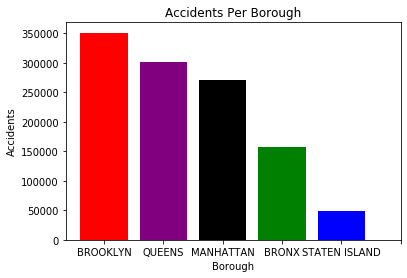

In [16]:
freqs = Accident_data['BOROUGH'].value_counts()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Accidents Per Borough")
ax.bar(freqs.index, freqs.values, color=['red','purple', 'black', 'green', 'blue'])
ax.set_xticks([0,1,2,3,4,5])
ax.set_xlabel("Borough")
ax.set_ylabel("Accidents")

In [18]:
#Calculate accident amounts per date
Date.value_counts()

01/21/2014    1161
11/15/2018    1065
12/15/2017     999
05/19/2017     974
01/18/2015     961
02/03/2014     960
03/06/2015     939
05/18/2017     911
01/07/2017     896
03/02/2018     884
12/14/2017     883
09/30/2016     872
11/26/2013     867
11/09/2018     866
04/28/2017     857
10/21/2016     851
03/08/2013     851
06/29/2018     845
06/22/2017     845
12/14/2018     841
03/16/2017     839
06/14/2018     833
10/30/2017     832
10/27/2016     831
03/05/2015     830
10/12/2018     830
06/13/2017     829
09/15/2017     827
10/20/2017     823
09/06/2018     822
              ... 
09/03/2012     373
10/30/2012     372
01/06/2019     372
01/13/2019     371
05/29/2017     371
11/28/2019     368
12/25/2016     365
02/01/2015     361
07/04/2014     360
01/20/2014     360
10/31/2015     357
01/21/2013     355
12/25/2012     354
12/28/2014     349
11/02/2012     345
11/04/2012     344
03/02/2014     344
01/11/2015     341
12/25/2017     333
12/25/2018     329
12/25/2015     321
01/05/2014  

Text(0, 0.5, 'Date of Accidents')

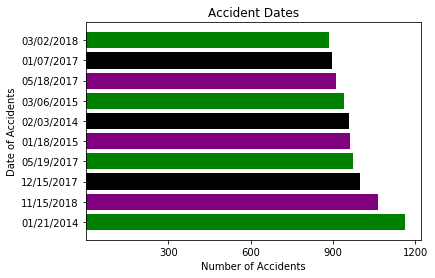

In [164]:
#show top 5 dates for accidents
freqs = Accident_data['CRASH DATE'].value_counts()
fig = plt.figure()
topdates = freqs.nlargest(10)
ax = fig.add_subplot(111)
ax.set_title("Accident Dates")
ax.barh(topdates.index, topdates.values, color=['green','purple', 'black'])
ax.set_xticks([300, 600,900,1200])
ax.set_xlabel("Number of Accidents")
ax.set_ylabel("Date of Accidents")

In [19]:
#Calculate Time in which accidents happen most frequently
Time.value_counts()

16:00    23829
17:00    23390
15:00    22913
18:00    21515
14:00    21024
13:00    19499
9:00     17664
19:00    17653
16:30    17386
12:00    17360
14:30    16436
17:30    16263
8:00     16221
10:00    16016
11:00    15838
18:30    14343
20:00    14057
8:30     13896
13:30    13750
0:00     13283
15:30    13230
12:30    13194
9:30     13049
11:30    12540
10:30    11882
19:30    11585
21:00    11557
22:00    10144
20:30     9095
23:00     8431
         ...  
4:01        68
5:21        68
3:53        68
4:41        68
3:09        67
3:44        67
3:39        67
4:04        66
3:14        66
4:06        66
1:59        66
3:21        66
3:43        64
5:31        64
3:36        63
3:01        62
3:24        62
4:59        62
2:51        62
4:31        61
3:32        61
2:31        61
3:51        60
3:34        60
3:59        59
2:59        56
4:03        56
3:41        55
4:02        54
3:31        53
Name: CRASH TIME, Length: 1440, dtype: int64

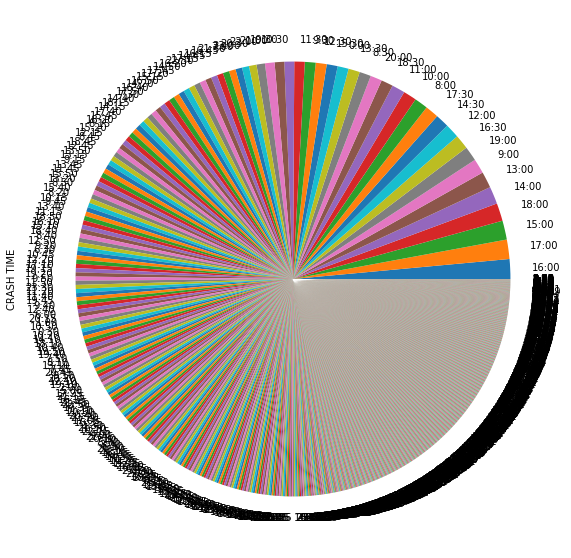

In [104]:
#TOTAL AMOUNT OF CRASH TIME IN PIE CHART ALL CRASHES
Accident_data['CRASH TIME'].value_counts().plot.pie(figsize=(10, 10))

Text(0, 0.5, 'Time of Day')

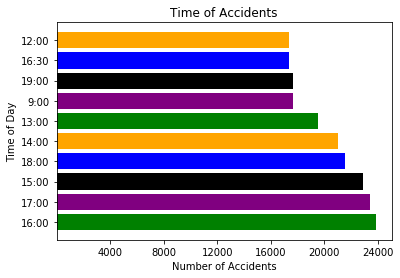

In [158]:
#show top 10 Times for accident Time of day
freqs = Accident_data['CRASH TIME'].value_counts()
fig = plt.figure()
topdates = freqs.nlargest(10)
ax = fig.add_subplot(111)
topdates.sort_index(ascending=False)
ax.set_title("Time of Accidents")

ax.barh(topdates.index, topdates.values, color=['green','purple', 'black','blue', 'orange'])
ax.set_xticks([4000,8000,12000, 16000, 20000, 24000])
ax.set_xlabel("Number of Accidents")
ax.set_ylabel("Time of Day")

In [20]:
#Calculate Zipcode in which accidents are most likely to occur
Zipcode.value_counts()

11207.0    11869
11101.0     8888
11236.0     8465
10019.0     8464
11207       8376
10036.0     8354
10016.0     8094
11201.0     8075
11385.0     8017
11203.0     7991
11234.0     7963
10001.0     7868
10022.0     7694
11226.0     7644
11434.0     7589
11212.0     7404
11208.0     7359
10013.0     7146
10002.0     6991
11101       6769
11233.0     6650
10019       6620
10016       6434
11230.0     6395
10022       6375
11206.0     6374
10467.0     6373
11220.0     6219
10036       6203
10001       6081
           ...  
10174          3
10171.0        3
10279          3
10112          3
10155          3
10106.0        3
10045.0        2
10173.0        2
10271          2
10171          2
11242.0        2
10803          2
10151          2
10041          2
10158.0        2
10106          2
10152.0        2
10152          2
10045          2
11241.0        1
10122          1
10176          1
10048          1
10103          1
10122.0        1
10166.0        1
10173          1
10179.0       

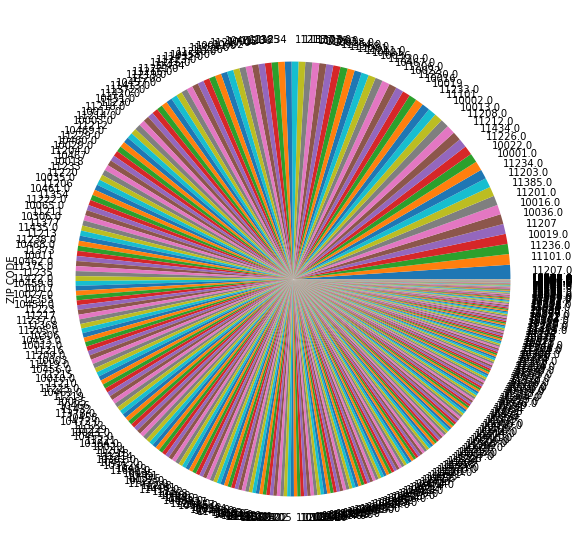

In [49]:
Accident_data['ZIP CODE'].value_counts().plot.pie(figsize=(10, 10))

In [21]:
#Calculate vehicle types most likely to be involved in accidents
Vehicle_Type.value_counts()

PASSENGER VEHICLE                      715236
SPORT UTILITY / STATION WAGON          313500
Sedan                                  163538
Station Wagon/Sport Utility Vehicle    132878
TAXI                                    50670
VAN                                     26540
OTHER                                   23982
PICK-UP TRUCK                           23069
UNKNOWN                                 19929
Taxi                                    17006
SMALL COM VEH(4 TIRES)                  14559
LARGE COM VEH(6 OR MORE TIRES)          14527
BUS                                     14057
Pick-up Truck                           10979
LIVERY VEHICLE                          10481
Box Truck                                8544
Bus                                      7049
MOTORCYCLE                               6536
BICYCLE                                  5568
Bike                                     4051
Tractor Truck Diesel                     3699
Van                               

/Users/francisregalado/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/francisregalado/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0, flags=flags)


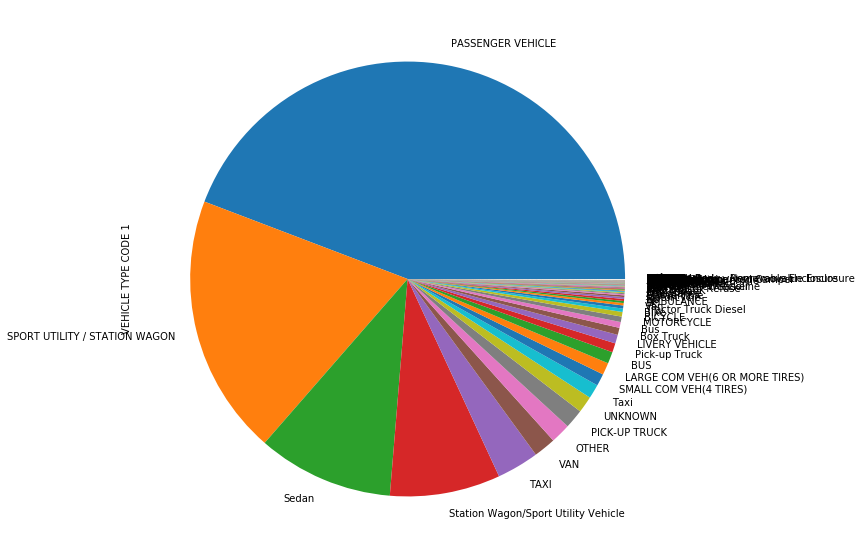

In [34]:
Accident_data['VEHICLE TYPE CODE 1'].value_counts().plot.pie(figsize=(10, 10))

In [137]:
#Calculate reason for accidents
rsn=Vehicle_Type2.value_counts()
toprsns=rsn.nlargest(30)
toprsns

Unspecified                                              1180185
Driver Inattention/Distraction                             74372
Other Vehicular                                            26985
Failure to Yield Right-of-Way                              14126
Following Too Closely                                      13770
Fatigued/Drowsy                                            10826
Passing or Lane Usage Improper                              9575
Turning Improperly                                          7769
Backing Unsafely                                            7068
Passing Too Closely                                         6715
Driver Inexperience                                         5507
Unsafe Lane Changing                                        5359
Traffic Control Disregarded                                 5345
Lost Consciousness                                          5223
Pavement Slippery                                           3501
Prescription Medication  

In [22]:
#Calculate the location with coordinates which experience the most accidents
Location.value_counts()

POINT (0 0)                       1113
POINT (-74.038086 40.608757)       670
POINT (-73.9845292 40.6960346)     586
POINT (-73.98453 40.696033)        565
POINT (-73.91282 40.861862)        515
POINT (-73.91243 40.8047)          509
POINT (-73.9643142 40.7606005)     473
POINT (-73.82744 40.798256)        462
POINT (-73.9897922 40.7572323)     455
POINT (-74.05198 40.604153)        440
POINT (-73.8968533 40.6757357)     433
POINT (-73.8906229 40.6585778)     417
POINT (-73.91727 40.77077)         394
POINT (-73.99491 40.704422)        382
POINT (-73.96434 40.7606)          375
POINT (-73.89083 40.820305)        371
POINT (-73.9940403 40.7203211)     368
POINT (-73.882744 40.816864)       364
POINT (-73.8703694 40.7334973)     354
POINT (-73.967462 40.7602226)      353
POINT (-73.87035 40.733536)        351
POINT (-73.9926328 40.7584292)     350
POINT (-73.9906233 40.7509908)     347
POINT (-73.9251435 40.8100528)     343
POINT (-73.99926 40.759514)        338
POINT (-73.99595 40.75898

In [23]:
#Calculate the street name accidents are most likely to occur
Street.value_counts()

BROADWAY                            16100
ATLANTIC AVENUE                     14239
3 AVENUE                            11642
NORTHERN BOULEVARD                  11358
BELT PARKWAY                        11035
FLATBUSH AVENUE                      9218
QUEENS BOULEVARD                     8925
LINDEN BOULEVARD                     8795
LONG ISLAND EXPRESSWAY               8466
2 AVENUE                             8445
BROOKLYN QUEENS EXPRESSWAY           8362
BRUCKNER BOULEVARD                   7494
GRAND CENTRAL PKWY                   7279
5 AVENUE                             6392
JAMAICA AVENUE                       6293
FDR DRIVE                            6150
7 AVENUE                             5635
HYLAN BOULEVARD                      5595
8 AVENUE                             5564
1 AVENUE                             5377
PARK AVENUE                          5311
WOODHAVEN BOULEVARD                  5134
MAJOR DEEGAN EXPRESSWAY              5045
ROCKAWAY BOULEVARD                

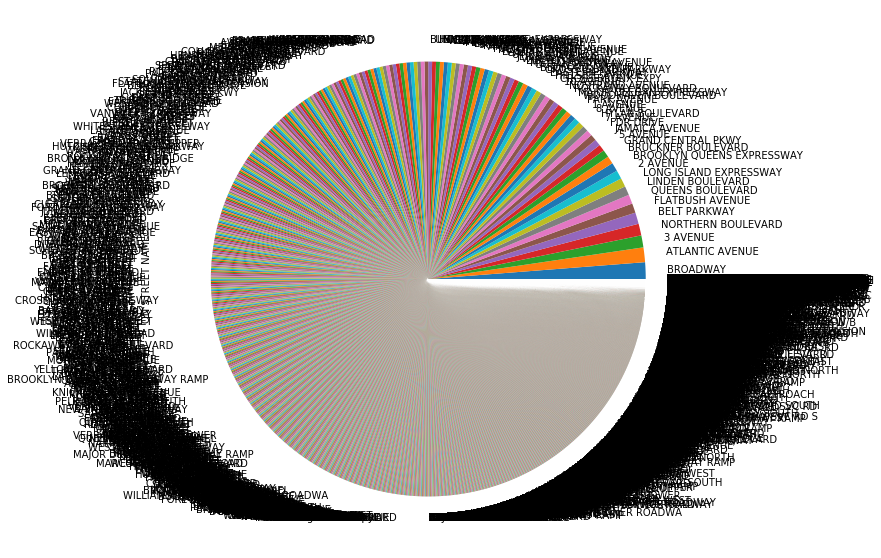

In [35]:
#All accidents by street name
Accident_data['ON STREET NAME'].value_counts().plot.pie(figsize=(10, 10))

Text(0, 0.5, 'Name of Streets')

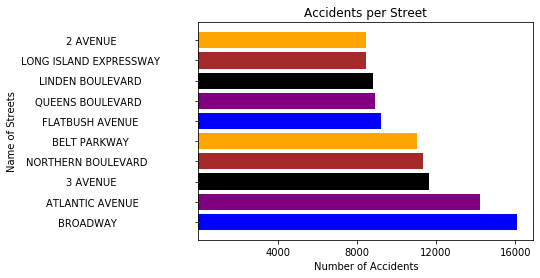

In [170]:
#show top 10 Streets by accidents
freqs = Accident_data['ON STREET NAME'].value_counts()
fig = plt.figure()
topdates = freqs.nlargest(10)
ax = fig.add_subplot(111)
ax.set_title("Accidents per Street")
ax.barh(topdates.index, topdates.values, color=['blue','purple', 'black', 'brown', 'orange'])
ax.set_xticks([4000, 8000,12000,16000])
ax.set_xlabel("Number of Accidents")
ax.set_ylabel("Name of Streets")

In [27]:
#Calculate number of people killed in the accidents
Killed.value_counts()

0.0    1621572
1.0       1770
2.0         43
3.0          6
4.0          2
8.0          1
5.0          1
Name: NUMBER OF PERSONS KILLED, dtype: int64

Text(0, 0.5, 'Amount')

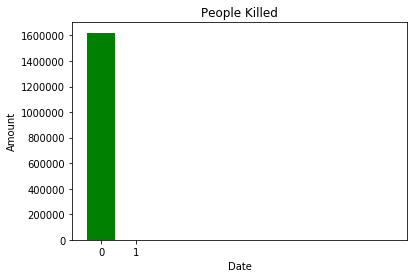

In [58]:
#Graph of persons killed
freqs = Accident_data['NUMBER OF PERSONS KILLED'].value_counts()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("People Killed")
ax.bar(freqs.index, freqs.values, color=['green','purple', 'black'])
ax.set_xticks([0, 1])
ax.set_xlabel("Date")
ax.set_ylabel("Amount")

In [28]:
#Calculate number of injured in the accidents
Injured.value_counts()

0.0     1310483
1.0      242331
2.0       45548
3.0       15142
4.0        5739
5.0        2307
6.0         980
7.0         418
8.0         177
9.0          97
10.0         60
11.0         38
12.0         27
13.0         18
14.0          7
16.0          7
15.0          6
17.0          4
18.0          4
19.0          4
22.0          3
24.0          3
20.0          2
27.0          1
32.0          1
43.0          1
31.0          1
Name: NUMBER OF PERSONS INJURED, dtype: int64

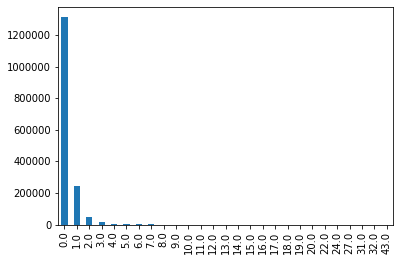

In [39]:
#Number of persons injured graphed
freqs_zipcode = Accident_data['NUMBER OF PERSONS INJURED'].value_counts().sort_index()
freqs_zipcode.plot.bar()